In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# Specify the file paths for the data files
antos_file_path = '/content/drive/MyDrive/Datasets/ANTO2_sim (1).txt'
plov_file_path = '/content/drive/MyDrive/Datasets/ANTO2_USGS (1).txt'

# Create empty lists to store the file contents
antos_data = []
plov_data = []

# Read the 'antos.txt' file
with open(antos_file_path, 'r') as antos_file:
    antos_data = antos_file.readlines()

# Read the 'plov.txt' file
with open(plov_file_path, 'r') as plov_file:
    plov_data = plov_file.readlines()




In [3]:
# Reading the data from the file as a Pandas DataFrame
# Skipping the first 7 lines (metadata), and using the 8th line as column names
df = pd.read_csv(antos_file_path, delimiter='\t', skiprows=7, names=["GMT", "QINE"])

# Converting the 'GMT' column to datetime format
df['GMT'] = pd.to_datetime(df['GMT'], format='%m-%d-%Y %H:%M')

# Creating a mask to filter rows within the date range 1953 to 1989
mask = (df['GMT'].dt.year >= 1990) & (df['GMT'].dt.year <= 2023)

# Using the mask to keep rows within the specified date range
df_filtered = df[mask]

# Displaying the first 10 rows of the filtered DataFrame
print(df_filtered.head(10))


                      GMT  QINE
53478 1990-01-01 00:00:00    63
53479 1990-01-01 06:00:00    64
53480 1990-01-01 12:00:00    64
53481 1990-01-01 18:00:00    64
53482 1990-01-02 00:00:00    65
53483 1990-01-02 06:00:00    65
53484 1990-01-02 12:00:00    65
53485 1990-01-02 18:00:00    65
53486 1990-01-03 00:00:00    65
53487 1990-01-03 06:00:00    66


In [4]:
# Renaming the 'GMT' column to 'datetime'
df_1 = df_filtered.rename(columns={'GMT': 'datetime','QINE': 'Discharge_Sim'})

# Displaying the first 10 rows of the updated DataFrame
print(df_1.head(10))


                 datetime  Discharge_Sim
53478 1990-01-01 00:00:00             63
53479 1990-01-01 06:00:00             64
53480 1990-01-01 12:00:00             64
53481 1990-01-01 18:00:00             64
53482 1990-01-02 00:00:00             65
53483 1990-01-02 06:00:00             65
53484 1990-01-02 12:00:00             65
53485 1990-01-02 18:00:00             65
53486 1990-01-03 00:00:00             65
53487 1990-01-03 06:00:00             66


In [5]:
df_1.shape



(45291, 2)

In [6]:
# Checking for missing values in each column
missing_values = df_1.isnull().sum()

# Displaying the count of missing values for each column
print("Missing Values:")
print(missing_values)


Missing Values:
datetime         0
Discharge_Sim    0
dtype: int64


In [7]:
# Printing the first 50 lines of 'plov.txt' file
print("Contents of the first 50 lines in 'plov.txt' file:")
for i, line in enumerate(plov_data[:50], start=1):
    print(f"{i}: {line}", end="")

# Adding a separator line
print("\n" + "=" * 40 + "\n")


Contents of the first 50 lines in 'plov.txt' file:
1: # ---------------------------------- WARNING ----------------------------------------
2: # Some of the data that you have obtained from this U.S. Geological Survey database
3: # may not have received Director's approval. Any such data values are qualified
4: # as provisional and are subject to revision. Provisional data are released on the
5: # condition that neither the USGS nor the United States Government may be held liable
6: # for any damages resulting from its use.
7: #
8: # Additional info: https://help.waterdata.usgs.gov/policies/provisional-data-statement
9: #
10: # File-format description:  https://help.waterdata.usgs.gov/faq/about-tab-delimited-output
11: # Automated-retrieval info: https://help.waterdata.usgs.gov/faq/automated-retrievals
12: #
13: # Contact:   gs-w_waterdata_support@usgs.gov
14: # retrieved: 2023-05-19 10:21:05 EDT       (nadww02)
15: #
16: # Data for the following 1 site(s) are contained in this file
17

In [ ]:

from io import StringIO

# Specifying the file path for the data file
plov_file_path = '/content/drive/MyDrive/Datasets/ANTO2_USGS (1).txt'

# Reading the data from the file as a string
with open(plov_file_path, 'r') as plov_file:
    plov_data = plov_file.read()

# Reading the data as a Pandas DataFrame
# Skip the first 36 lines (metadata), and use the 37th line as column names
df1 = pd.read_csv(StringIO(plov_data), delimiter='\t', skiprows=36, names=["agency_cd", "site_no", "datetime", "tz_cd", "112837_00060", "112837_00060_cd"])

# Displaying the first 10 rows of the DataFrame
print(df1.head(10))


  agency_cd  site_no          datetime tz_cd  112837_00060 112837_00060_cd
0      USGS  7336200  1990-10-01 03:00   CDT         142.0          A:[91]
1      USGS  7336200  1990-10-01 04:00   CDT         140.0          A:[91]
2      USGS  7336200  1990-10-01 05:00   CDT         138.0          A:[91]
3      USGS  7336200  1990-10-01 06:00   CDT         136.0          A:[91]
4      USGS  7336200  1990-10-01 07:00   CDT         132.0          A:[91]
5      USGS  7336200  1990-10-01 08:00   CDT         130.0          A:[91]
6      USGS  7336200  1990-10-01 09:00   CDT         128.0          A:[91]
7      USGS  7336200  1990-10-01 10:00   CDT         126.0          A:[91]
8      USGS  7336200  1990-10-01 11:00   CDT         124.0          A:[91]
9      USGS  7336200  1990-10-01 12:00   CDT         122.0          A:[91]


In [ ]:
# Checking for missing values in each column
missing_values = df1.isnull().sum()

# Displaying the count of missing values for each column
print("Missing Values:")
print(missing_values)


Missing Values:
agency_cd          0
site_no            0
datetime           0
tz_cd              0
112837_00060       0
112837_00060_cd    0
dtype: int64


In [9]:

from io import StringIO
import pytz

# Reading the data from the file as a string
with open(plov_file_path, 'r') as plov_file:
    plov_data = plov_file.read()

# Reading the data as a Pandas DataFrame
# Skipping the first 36 lines (metadata), and using the 37th line as column names
df1 = pd.read_csv(StringIO(plov_data), delimiter='\t', skiprows=36, names=["agency_cd", "site_no", "datetime", "tz_cd", "112837_00060", "112837_00060_cd"])

# Converting the 'datetime' column to datetime objects
df1['datetime'] = pd.to_datetime(df1['datetime'])

# Defining the CDT and UTC time zones
cdt_timezone = pytz.timezone('US/Central')
utc_timezone = pytz.timezone('UTC')

# Handling ambiguous times by specifying the standard time offset (non-DST)
df1['datetime'] = df1['datetime'].dt.tz_localize(cdt_timezone, ambiguous='NaT').dt.tz_convert(utc_timezone)

# Displaying the first 10 rows of the DataFrame with UTC time
print(df1[['datetime']].head(10))


                   datetime
0 1990-10-01 08:00:00+00:00
1 1990-10-01 09:00:00+00:00
2 1990-10-01 10:00:00+00:00
3 1990-10-01 11:00:00+00:00
4 1990-10-01 12:00:00+00:00
5 1990-10-01 13:00:00+00:00
6 1990-10-01 14:00:00+00:00
7 1990-10-01 15:00:00+00:00
8 1990-10-01 16:00:00+00:00
9 1990-10-01 17:00:00+00:00


In [10]:
# Checking the actual column names in the DataFrame
print("Column Names:")
print(df1.columns)

Column Names:
Index(['agency_cd', 'site_no', 'datetime', 'tz_cd', '112837_00060',
       '112837_00060_cd'],
      dtype='object')


In [11]:
# Renaming the 'GMT' column to 'datetime'
df1 = df1.rename(columns={'112837_00060': 'Discharge_USGS'})

# Displaying the first 10 rows of the updated DataFrame
print(df1.head(10))


  agency_cd  site_no                  datetime tz_cd  Discharge_USGS  \
0      USGS  7336200 1990-10-01 08:00:00+00:00   CDT           142.0   
1      USGS  7336200 1990-10-01 09:00:00+00:00   CDT           140.0   
2      USGS  7336200 1990-10-01 10:00:00+00:00   CDT           138.0   
3      USGS  7336200 1990-10-01 11:00:00+00:00   CDT           136.0   
4      USGS  7336200 1990-10-01 12:00:00+00:00   CDT           132.0   
5      USGS  7336200 1990-10-01 13:00:00+00:00   CDT           130.0   
6      USGS  7336200 1990-10-01 14:00:00+00:00   CDT           128.0   
7      USGS  7336200 1990-10-01 15:00:00+00:00   CDT           126.0   
8      USGS  7336200 1990-10-01 16:00:00+00:00   CDT           124.0   
9      USGS  7336200 1990-10-01 17:00:00+00:00   CDT           122.0   

  112837_00060_cd  
0          A:[91]  
1          A:[91]  
2          A:[91]  
3          A:[91]  
4          A:[91]  
5          A:[91]  
6          A:[91]  
7          A:[91]  
8          A:[91]  
9      

In [12]:
# Dropping the 'tz_cd' column from the DataFrame
df1 = df1.drop(columns=['tz_cd'])
# Displaying the first 10 rows of the updated DataFrame
print(df1.head(10))


  agency_cd  site_no                  datetime  Discharge_USGS 112837_00060_cd
0      USGS  7336200 1990-10-01 08:00:00+00:00           142.0          A:[91]
1      USGS  7336200 1990-10-01 09:00:00+00:00           140.0          A:[91]
2      USGS  7336200 1990-10-01 10:00:00+00:00           138.0          A:[91]
3      USGS  7336200 1990-10-01 11:00:00+00:00           136.0          A:[91]
4      USGS  7336200 1990-10-01 12:00:00+00:00           132.0          A:[91]
5      USGS  7336200 1990-10-01 13:00:00+00:00           130.0          A:[91]
6      USGS  7336200 1990-10-01 14:00:00+00:00           128.0          A:[91]
7      USGS  7336200 1990-10-01 15:00:00+00:00           126.0          A:[91]
8      USGS  7336200 1990-10-01 16:00:00+00:00           124.0          A:[91]
9      USGS  7336200 1990-10-01 17:00:00+00:00           122.0          A:[91]


In [13]:
df1.shape

(450844, 5)

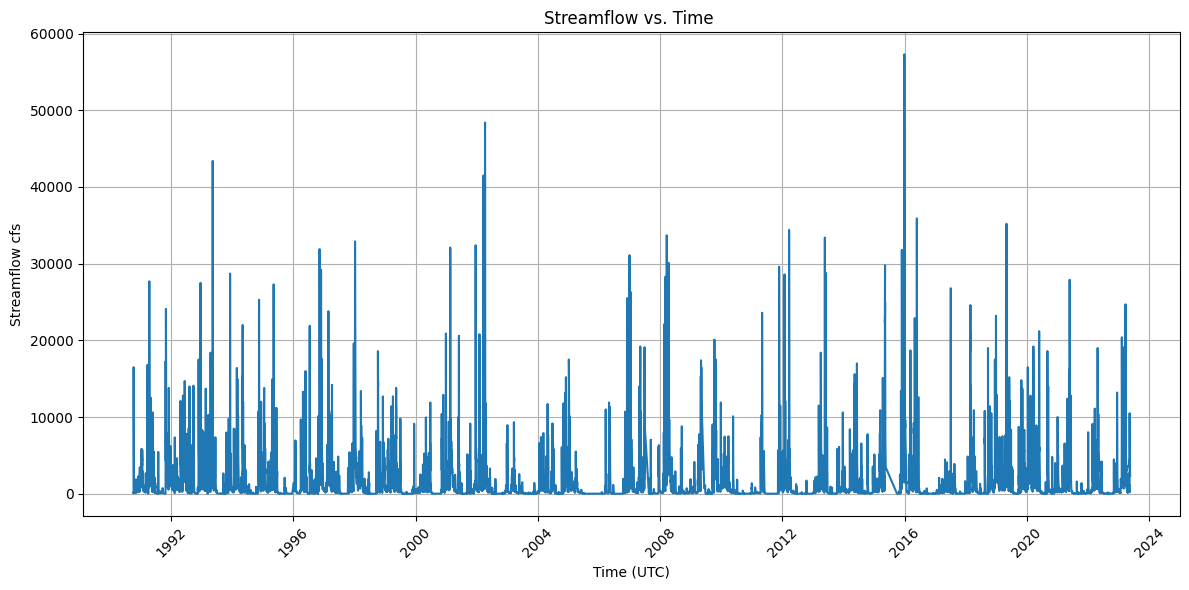

In [14]:
# Filtering out rows with NaT values in 'datetime' column
df1 = df1.dropna(subset=['datetime'])

# Plot for df1
plt.figure(figsize=(12, 6))
plt.plot(df1['datetime'], df1['Discharge_USGS'])
plt.xlabel('Time (UTC)')
plt.ylabel('Streamflow cfs')
plt.title('Streamflow vs. Time ')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
# Converting 'datetime' column in df1 to match the format in df
df1['datetime'] = pd.to_datetime(df1['datetime']).dt.strftime('%m-%d-%Y %H:%M')

# Displaying the first 10 rows of the updated DataFrame
print(df1.head(10))


  agency_cd  site_no          datetime  Discharge_USGS 112837_00060_cd
0      USGS  7336200  10-01-1990 08:00           142.0          A:[91]
1      USGS  7336200  10-01-1990 09:00           140.0          A:[91]
2      USGS  7336200  10-01-1990 10:00           138.0          A:[91]
3      USGS  7336200  10-01-1990 11:00           136.0          A:[91]
4      USGS  7336200  10-01-1990 12:00           132.0          A:[91]
5      USGS  7336200  10-01-1990 13:00           130.0          A:[91]
6      USGS  7336200  10-01-1990 14:00           128.0          A:[91]
7      USGS  7336200  10-01-1990 15:00           126.0          A:[91]
8      USGS  7336200  10-01-1990 16:00           124.0          A:[91]
9      USGS  7336200  10-01-1990 17:00           122.0          A:[91]


In [16]:
# Checking the column names in df_filtered
column_names = df1.columns
print(column_names)


Index(['agency_cd', 'site_no', 'datetime', 'Discharge_USGS',
       '112837_00060_cd'],
      dtype='object')


In [17]:
df1['datetime'] = pd.to_datetime(df1['datetime'])


In [18]:
# Joining the DataFrames on the 'datetime' column
merged_df = df_1.merge(df1, on='datetime', how='inner')

# Displaying the first 10 rows of the merged DataFrame
print(merged_df.head(10))


             datetime  Discharge_Sim agency_cd  site_no  Discharge_USGS  \
0 1990-10-01 12:00:00            129      USGS  7336200           132.0   
1 1990-10-01 18:00:00            127      USGS  7336200           120.0   
2 1990-10-02 00:00:00            126      USGS  7336200           115.0   
3 1990-10-02 06:00:00            125      USGS  7336200           107.0   
4 1990-10-02 12:00:00            124      USGS  7336200           104.0   
5 1990-10-02 18:00:00            123      USGS  7336200           100.0   
6 1990-10-03 00:00:00            122      USGS  7336200            99.0   
7 1990-10-03 06:00:00            121      USGS  7336200            93.0   
8 1990-10-03 12:00:00            121      USGS  7336200            90.0   
9 1990-10-03 18:00:00            120      USGS  7336200            87.0   

  112837_00060_cd  
0          A:[91]  
1          A:[91]  
2          A:[91]  
3          A:[91]  
4          A:[91]  
5          A:[91]  
6          A:[91]  
7          A:[

In [20]:

from sklearn.metrics import r2_score
merged_df['datetime'] = pd.to_datetime(merged_df['datetime'])

# Extracting year and month into separate columns
merged_df['year'] = merged_df['datetime'].dt.year
merged_df['month'] = merged_df['datetime'].dt.month

# Creating a function to calculate R-squared for each group
def calculate_r_squared(group):
    return r2_score(group['Discharge_Sim'], group['Discharge_USGS'])

# Group by year and month, and calculate R-squared for each group
r_squared_by_month_year = merged_df.groupby(['year', 'month']).apply(calculate_r_squared)

# Displaying the R-squared values for each month and year
print(r_squared_by_month_year)


year  month
1990  10       0.547011
      11      -0.739536
      12      -1.089524
1991  1       -1.967177
      2       -0.296426
                 ...   
2020  8        0.553010
      9        0.757698
      10       0.742444
      11       0.675472
      12       0.677266
Length: 360, dtype: float64


In [21]:

from sklearn.metrics import r2_score
# Converting 'datetime' to a datetime object
merged_df['datetime'] = pd.to_datetime(merged_df['datetime'])

# Extracting year and month into separate columns
merged_df['year'] = merged_df['datetime'].dt.year
merged_df['month'] = merged_df['datetime'].dt.month

# Creating a function to calculate R-squared for each group
def calculate_r_squared(group):
    return r2_score(group['Discharge_Sim'], group['Discharge_USGS'])

# Group by year and month, and calculate R-squared for each group
r_squared_by_month_year = merged_df.groupby(['year', 'month']).apply(calculate_r_squared)

# Resetting the index of the resulting DataFrame
r_squared_by_month_year = r_squared_by_month_year.reset_index()

# Renaming the columns for clarity
r_squared_by_month_year.columns = ['Year', 'Month', 'R-squared']

# Displaying the DataFrame with R-squared values for every month and year
print(r_squared_by_month_year)


     Year  Month  R-squared
0    1990     10   0.547011
1    1990     11  -0.739536
2    1990     12  -1.089524
3    1991      1  -1.967177
4    1991      2  -0.296426
..    ...    ...        ...
355  2020      8   0.553010
356  2020      9   0.757698
357  2020     10   0.742444
358  2020     11   0.675472
359  2020     12   0.677266

[360 rows x 3 columns]


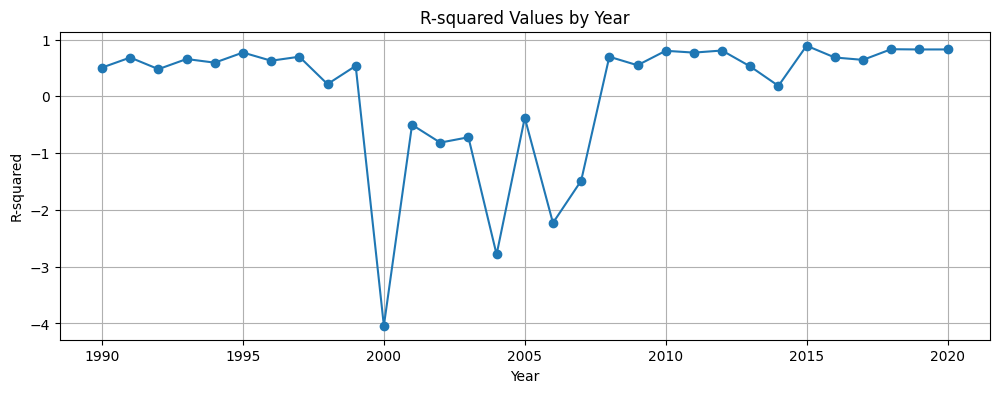

In [22]:
merged_df['datetime'] = pd.to_datetime(merged_df['datetime'])

# Extracting year into a separate column
merged_df['year'] = merged_df['datetime'].dt.year

# Creating a function to calculate R-squared for each group
def calculate_r_squared(group):
    return r2_score(group['Discharge_Sim'], group['Discharge_USGS'])

# Group by year and calculate R-squared for each group
r_squared_by_year = merged_df.groupby(['year']).apply(calculate_r_squared)

# Resetting the index of the resulting DataFrame
r_squared_by_year = r_squared_by_year.reset_index()

# Renaming the columns for clarity
r_squared_by_year.columns = ['Year', 'R-squared']

# Creating a line plot of R-squared values for each year
plt.figure(figsize=(12, 4))
plt.plot(r_squared_by_year['Year'], r_squared_by_year['R-squared'], marker='o', linestyle='-')
plt.title('R-squared Values by Year')
plt.xlabel('Year')
plt.ylabel('R-squared')
plt.grid(True)

# Showing the plot
plt.show()


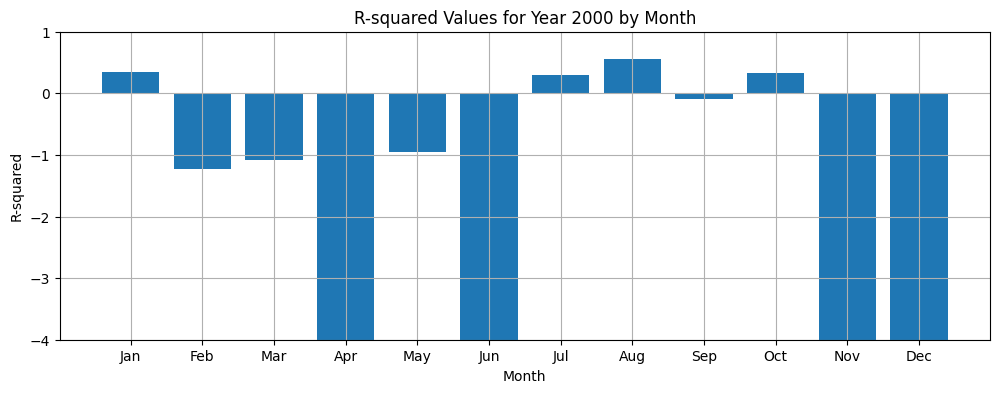

In [24]:
merged_df['datetime'] = pd.to_datetime(merged_df['datetime'])

# Filtering for the year 2000
df_2000 = merged_df[merged_df['datetime'].dt.year == 2000]

# Creating a function to calculate R-squared for each month
def calculate_r_squared(group):
    return r2_score(group['Discharge_Sim'], group['Discharge_USGS'])

# Grouping by month and calculate R-squared for each group
r_squared_by_month = df_2000.groupby(df_2000['datetime'].dt.month).apply(calculate_r_squared)

# Resetting the index of the resulting DataFrame
r_squared_by_month = r_squared_by_month.reset_index()

# Renaming the columns for clarity
r_squared_by_month.columns = ['Month', 'R-squared']

# Creating a bar plot of R-squared values for each month in the year 2000
plt.figure(figsize=(12, 4))
plt.bar(r_squared_by_month['Month'], r_squared_by_month['R-squared'], tick_label=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('R-squared Values for Year 2000 by Month')
plt.xlabel('Month')
plt.ylabel('R-squared')
plt.ylim(-4, 1)
plt.grid(True)

# Showing the plot
plt.show()


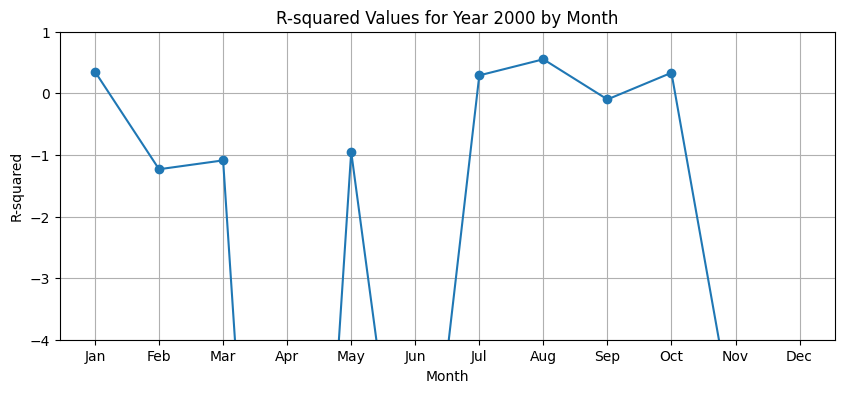

In [26]:
merged_df['datetime'] = pd.to_datetime(merged_df['datetime'])

# Filtering for the year 2000
df_2000 = merged_df[merged_df['datetime'].dt.year == 2000]

# Creating a function to calculate R-squared for each month
def calculate_r_squared(group):
    return r2_score(group['Discharge_Sim'], group['Discharge_USGS'])

# Grouping by month and calculate R-squared for each group
r_squared_by_month = df_2000.groupby(df_2000['datetime'].dt.month).apply(calculate_r_squared)

# Reset the index of the resulting DataFrame
r_squared_by_month = r_squared_by_month.reset_index()

# Renaming the columns for clarity
r_squared_by_month.columns = ['Month', 'R-squared']

# Creating a line plot of R-squared values for each month in the year 2000
plt.figure(figsize=(10, 4))
months = [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
]
plt.plot(months, r_squared_by_month['R-squared'], marker='o', linestyle='-')
plt.title('R-squared Values for Year 2000 by Month')
plt.xlabel('Month')
plt.ylabel('R-squared')
plt.ylim(-4, 1)
plt.grid(True)

# Show the plot
plt.show()


In [62]:
# Filter data for the year 2000
df_2000 = merged_df[merged_df['datetime'].dt.year == 2000]

# Define a function to calculate NSE
def calculate_nse(group):
    sim_values = group['Discharge_Sim'].values
    usgs_values = group['Discharge_USGS'].values
    mean_observed = np.mean(usgs_values)

    # Calculate NSE
    nse = 1 - mean_squared_error(usgs_values, sim_values) / mean_squared_error(usgs_values, np.full_like(usgs_values, mean_observed))

    return nse

# Group by month and calculate NSE for each group
nse_by_month = df_2000.groupby(df_2000['datetime'].dt.month).apply(calculate_nse)

# Reset the index of the resulting DataFrame
nse_by_month = nse_by_month.reset_index()

# Renaming the columns for clarity
nse_by_month.columns = ['Month', 'NSE']

# Print NSE values for each month
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for month, nse_value in zip(months, nse_by_month['NSE']):
    print(f'NSE for {month}: {nse_value}')


NSE for Jan: -0.24968287792335198
NSE for Feb: -0.3829738088965322
NSE for Mar: -0.2453767020878459
NSE for Apr: -0.6136368719210439
NSE for May: 0.21579434460680946
NSE for Jun: 0.06434476755222929
NSE for Jul: -4.210177146510533
NSE for Aug: -1.573357328744394
NSE for Sep: -30935.48590838059
NSE for Oct: -6.858803909369722
NSE for Nov: 0.09838256702010018
NSE for Dec: -0.15609379809537205


In [27]:
r_squared_by_month.sort_values('R-squared')

,Month,R-squared
3,4,-16.838968
11,12,-13.759737
5,6,-8.718402
10,11,-5.514180
1,2,-1.232470
2,3,-1.088675
4,5,-0.950841
8,9,-0.098941
6,7,0.291133
9,10,0.333595


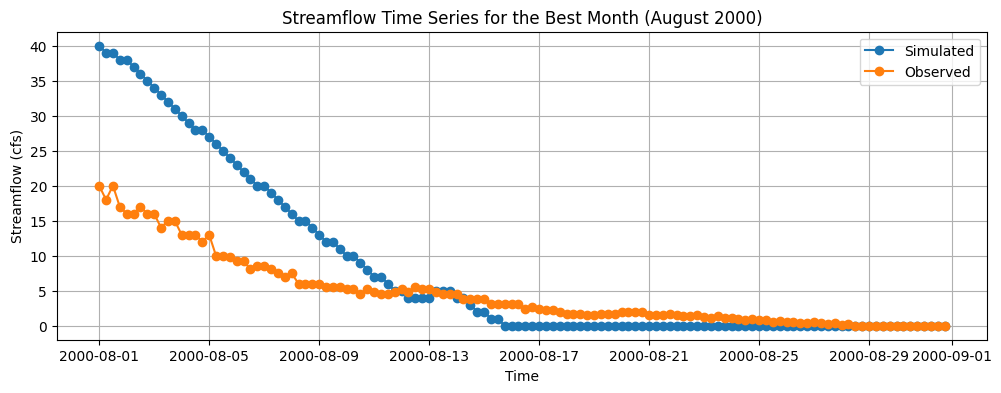

In [28]:
merged_df['datetime'] = pd.to_datetime(merged_df['datetime'])

# Filtering for the best month (August)
best_month_data = merged_df[(merged_df['datetime'].dt.year == 2000) & (merged_df['datetime'].dt.month == 8)]

# Separating the simulated and observed data
simulated_data = best_month_data['Discharge_Sim']
observed_data = best_month_data['Discharge_USGS']

# Creating a time series plot
plt.figure(figsize=(12, 4))
plt.plot(best_month_data['datetime'], simulated_data, label='Simulated', linestyle='-', marker='o')
plt.plot(best_month_data['datetime'], observed_data, label='Observed', linestyle='-', marker='o')
plt.title('Streamflow Time Series for the Best Month (August 2000)')
plt.xlabel('Time')
plt.ylabel('Streamflow (cfs)')
plt.legend()
plt.grid(True)

# Showing the plot
plt.show()


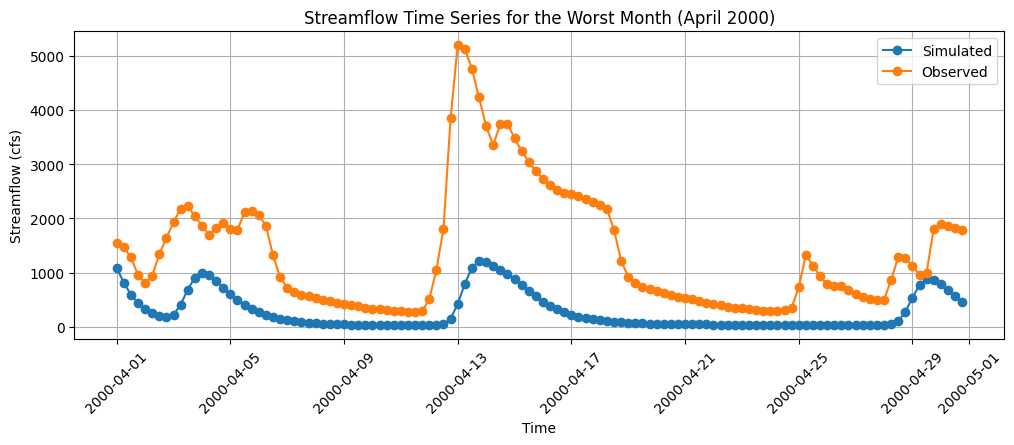

In [29]:

merged_df['datetime'] = pd.to_datetime(merged_df['datetime'])

# Filtering for the worst month (April)
worst_month_data = merged_df[(merged_df['datetime'].dt.year == 2000) & (merged_df['datetime'].dt.month == 4)]

# Separating the simulated and observed data
simulated_data = worst_month_data['Discharge_Sim']
observed_data = worst_month_data['Discharge_USGS']

# Creating a time series plot
plt.figure(figsize=(12, 4))
plt.plot(worst_month_data['datetime'], simulated_data, label='Simulated', linestyle='-', marker='o')
plt.plot(worst_month_data['datetime'], observed_data, label='Observed', linestyle='-', marker='o')
plt.title('Streamflow Time Series for the Worst Month (April 2000)')
plt.xlabel('Time')
plt.ylabel('Streamflow (cfs)')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.grid(True)

# Showing the plot
plt.show()


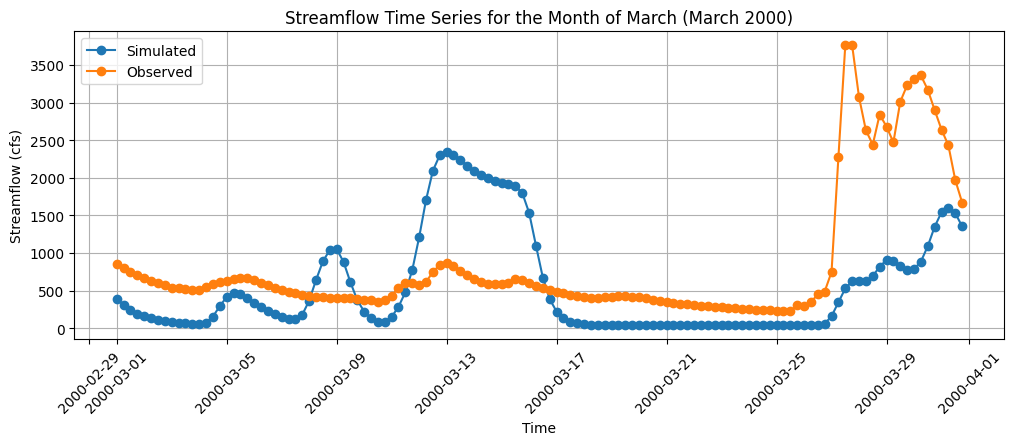

In [30]:
merged_df['datetime'] = pd.to_datetime(merged_df['datetime'])

# Filtering for the month of March
march_data = merged_df[(merged_df['datetime'].dt.year == 2000) & (merged_df['datetime'].dt.month == 3)]

# Separating the simulated and observed data
simulated_data = march_data['Discharge_Sim']
observed_data = march_data['Discharge_USGS']

# Creating a time series plot
plt.figure(figsize=(12, 4))
plt.plot(march_data['datetime'], simulated_data, label='Simulated', linestyle='-', marker='o')
plt.plot(march_data['datetime'], observed_data, label='Observed', linestyle='-', marker='o')
plt.title('Streamflow Time Series for the Month of March (March 2000)')
plt.xlabel('Time')
plt.ylabel('Streamflow (cfs)')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.grid(True)

# Showing the plot
plt.show()


In [31]:
merged_df.head()

,datetime,Discharge_Sim,agency_cd,site_no,Discharge_USGS,112837_00060_cd,year,month
0,1990-10-01 12:00:00,129,USGS,7336200,132.0,A:[91],1990,10
1,1990-10-01 18:00:00,127,USGS,7336200,120.0,A:[91],1990,10
2,1990-10-02 00:00:00,126,USGS,7336200,115.0,A:[91],1990,10
3,1990-10-02 06:00:00,125,USGS,7336200,107.0,A:[91],1990,10
4,1990-10-02 12:00:00,124,USGS,7336200,104.0,A:[91],1990,10


In [33]:


# Calculating the mean of observed and simulated streamflow
OBS_mean = merged_df['Discharge_USGS'].mean()
SIM_mean = merged_df['Discharge_Sim'].mean()

# Calculating the sum of squared differences
SSD = ((merged_df['Discharge_USGS'] - merged_df['Discharge_Sim']) ** 2).sum()

# Calculating sum of squared differences from observed mean
SSD_obs_mean = ((merged_df['Discharge_USGS'] - OBS_mean) ** 2).sum()

# Calculating NSE
NSE = 1 - (SSD / SSD_obs_mean)

print("NSE Score:", NSE)


NSE Score: 0.7095349952666906


The NSE score of approximately 0.71 indicates a reasonably good fit between the observed and simulated streamflow data for the dataset. This suggests that the simulation is performing fairly well in representing the observed streamflow, with an NSE score of 1 being a perfect fit.

**Linear Regression Model**

In [34]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


features = ['year', 'month','Discharge_USGS']
target = 'Discharge_Sim'

# Split the dataset into training and testing sets
X = merged_df[features]
y = merged_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Linear Regression model
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculating Nash-Sutcliffe Efficiency (NSE)
nse = 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

# Printing the model's performance metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print(f"Nash-Sutcliffe Efficiency (NSE): {nse}")

# printing the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error (MSE): 2003395.3996692193
R-squared (R2): 0.7194373523268922
Nash-Sutcliffe Efficiency (NSE): 0.7194373523268922
Coefficients: [ 4.8143496  -9.66120135  0.712614  ]
Intercept: -9460.341046319096


**LSTM -Deep Learning**
- Random data_splitting

In [35]:

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error


data = merged_df.copy()
data['datetime'] = pd.to_datetime(data['datetime'])
data.set_index('datetime', inplace=True)

# Extracting the streamflow values as the target variable
streamflow = data['Discharge_Sim'].values

# Normalizing the streamflow data (scaling to values between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))
streamflow = scaler.fit_transform(streamflow.reshape(-1, 1))

# Defining a function to prepare the dataset for LSTM
def prepare_dataset(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps])
        y.append(data[i + n_steps])
    return np.array(X), np.array(y)

# Defining the number of time steps to consider (30 days because its a monthly data)
n_steps = 30

# Preparing the dataset
X, y = prepare_dataset(streamflow, n_steps)

# Splitting the dataset into training and testing sets
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test, y_train, y_test = X[:split_index], X[split_index:], y[:split_index], y[split_index:]

# Defining the LSTM model
model = Sequential()
model.add(LSTM(units=10, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Making the predictions on the test set
y_pred = model.predict(X_test)






Epoch 1/10
1032/1032 [==============================] - 14s 12ms/step - loss: 5.0865e-04
Epoch 2/10
1032/1032 [==============================] - 12s 11ms/step - loss: 1.4138e-04
Epoch 3/10
1032/1032 [==============================] - 11s 11ms/step - loss: 9.7745e-05
Epoch 4/10
1032/1032 [==============================] - 12s 12ms/step - loss: 8.4221e-05
Epoch 5/10
1032/1032 [==============================] - 13s 12ms/step - loss: 8.0446e-05
Epoch 6/10
1032/1032 [==============================] - 12s 12ms/step - loss: 7.4620e-05
Epoch 7/10
1032/1032 [==============================] - 11s 11ms/step - loss: 7.2185e-05
Epoch 8/10
1032/1032 [==============================] - 13s 12ms/step - loss: 6.9483e-05
Epoch 9/10
1032/1032 [==============================] - 12s 12ms/step - loss: 6.9386e-05
Epoch 10/10
258/258 [==============================] - 1s 3ms/step


In [ ]:
# Inversing transform the predictions to the original scale
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Calculating Mean Squared Error (MSE) for evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculating Nash-Sutcliffe Efficiency (NSE) for evaluation
nse = 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))
print(f"Nash-Sutcliffe Efficiency (NSE): {nse}")


Mean Squared Error (MSE): 295130.0659304676
Nash-Sutcliffe Efficiency (NSE): 0.9792713425790311


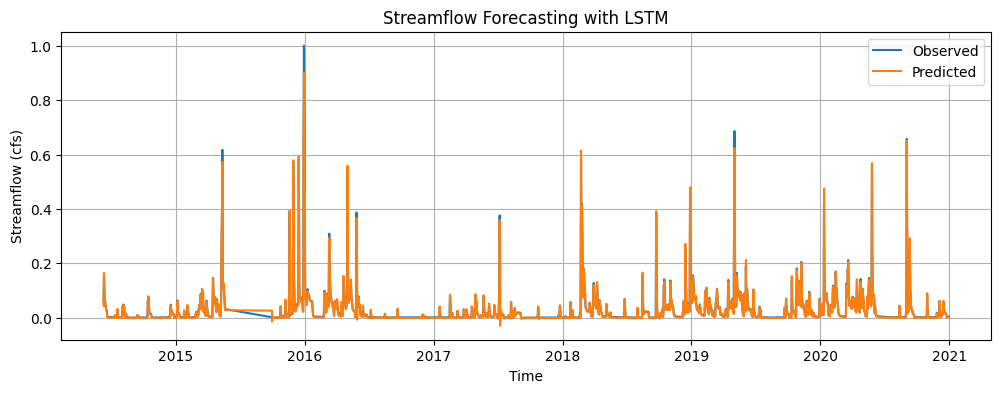

In [36]:
# Plotting the observed vs. predicted streamflow values
plt.figure(figsize=(12, 4))
plt.plot(data.index[-len(y_test):], y_test, label='Observed', linestyle='-')
plt.plot(data.index[-len(y_test):], y_pred, label='Predicted', linestyle='-')
plt.title('Streamflow Forecasting with LSTM')
plt.xlabel('Time')
plt.ylabel('Streamflow (cfs)')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
# Finding the start date (minimum date) in the dataset
start_date = merged_df['datetime'].min()

# Finding the end date (maximum date) in the dataset
end_date = merged_df['datetime'].max()

print("Start Date:", start_date)
print("End Date:", end_date)


Start Date: 1990-10-01 12:00:00
End Date: 2020-12-31 12:00:00


In [40]:
data = merged_df.copy()
data['datetime'] = pd.to_datetime(data['datetime'])
data.set_index('datetime', inplace=True)

# Defining the specific training and testing periods
training_period_start = '1990-10-01 12:00:00'
training_period_end = '2014-10-01 12:00:00'
testing_period_start = '2014-10-01 12:00:00'
testing_period_end = '2020-12-31 12:00:00'

# Extracting the streamflow values as the target variable
streamflow = data['Discharge_Sim'].values

# Filtering the data for the specified training and testing periods
train_data = data[(data.index >= training_period_start) & (data.index <= training_period_end)]
test_data = data[(data.index >= testing_period_start) & (data.index <= testing_period_end)]

# Extracting the streamflow values from the training and testing data
train_streamflow = train_data['Discharge_Sim'].values
test_streamflow = test_data['Discharge_Sim'].values

# Normalizing the streamflow data (scaling to values between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))
train_streamflow = scaler.fit_transform(train_streamflow.reshape(-1, 1))
test_streamflow = scaler.transform(test_streamflow.reshape(-1, 1))





In [41]:
# Defining a function to prepare the dataset for LSTM
def prepare_dataset(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps])
        y.append(data[i + n_steps])
    return np.array(X), np.array(y)

#  Defining the number of time steps to consider (30 days because its a monthly data)
n_steps = 30

# Preparing the dataset for training
X_train, y_train = prepare_dataset(train_streamflow, n_steps)

# Preparing the dataset for testing
X_test, y_test = prepare_dataset(test_streamflow, n_steps)

In [42]:

# Defining the LSTM model
model = Sequential()
model.add(LSTM(units=10, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions on the test set
y_pred = model.predict(X_test)

Epoch 1/10
1046/1046 [==============================] - 18s 12ms/step - loss: 0.0018
Epoch 2/10
1046/1046 [==============================] - 12s 11ms/step - loss: 6.7703e-04
Epoch 3/10
1046/1046 [==============================] - 13s 12ms/step - loss: 3.2552e-04
Epoch 4/10
1046/1046 [==============================] - 13s 13ms/step - loss: 1.7655e-04
Epoch 5/10
1046/1046 [==============================] - 13s 12ms/step - loss: 1.4800e-04
Epoch 6/10
1046/1046 [==============================] - 13s 12ms/step - loss: 1.3930e-04
Epoch 7/10
1046/1046 [==============================] - 11s 11ms/step - loss: 1.3795e-04
Epoch 8/10
1046/1046 [==============================] - 13s 12ms/step - loss: 1.3429e-04
Epoch 9/10
1046/1046 [==============================] - 12s 12ms/step - loss: 1.3355e-04
Epoch 10/10
243/243 [==============================] - 1s 4ms/step


In [43]:
# Inversing transform the predictions to the original scale
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Calculating Mean Squared Error (MSE) for evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculating Nash-Sutcliffe Efficiency (NSE) for evaluation
nse = 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))
print(f"Nash-Sutcliffe Efficiency (NSE): {nse}")

Mean Squared Error (MSE): 369543.08592598187
Nash-Sutcliffe Efficiency (NSE): 0.9752583064677126


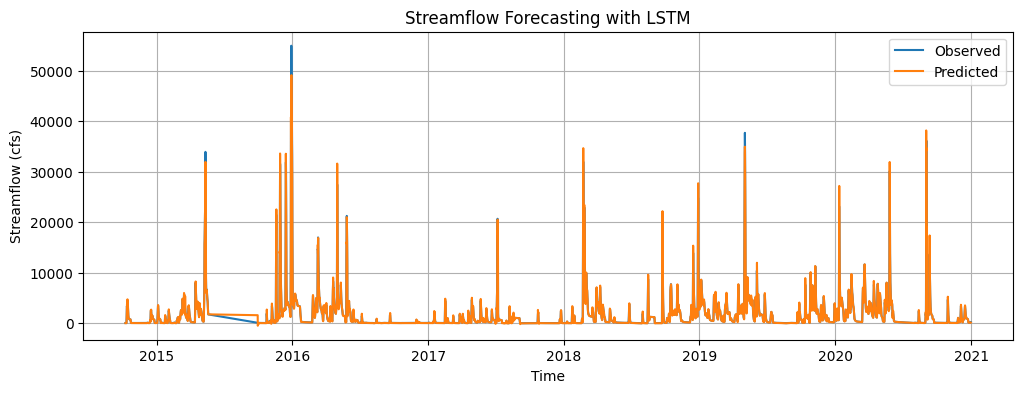

In [44]:
# Plotting the observed vs. predicted streamflow values
plt.figure(figsize=(12, 4))
plt.plot(test_data.index[n_steps:], y_test, label='Observed', linestyle='-')
plt.plot(test_data.index[n_steps:], y_pred, label='Predicted', linestyle='-')
plt.title('Streamflow Forecasting with LSTM')
plt.xlabel('Time')
plt.ylabel('Streamflow (cfs)')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
# Find the start date (minimum date) in the dataset
start_date = merged_df['datetime'].min()

# Find the end date (maximum date) in the dataset
end_date = merged_df['datetime'].max()

print("Start Date:", start_date)
print("End Date:", end_date)


Start Date: 1990-10-01 12:00:00
End Date: 2020-12-31 12:00:00


**Train - Test - Validation**

In [46]:


data = merged_df.copy()
data['datetime'] = pd.to_datetime(data['datetime'])
data.set_index('datetime', inplace=True)

# Define the time frames for training, testing, and validation

training_period_start_1 = '2005-10-02 12:00:00'
training_period_end_1 = '2020-12-31 12:00:00'
training_period_start_2 = '1995-10-02 12:00:00'
training_period_end_2 = '1999-10-01 12:00:00'
testing_period_start = '1999-10-02 12:00:00'
testing_period_end = '2005-10-01 12:00:00'
validation_period_start = '1990-10-01 12:00:00'
validation_period_end = '1995-10-01 12:00:00'

# Extracting the streamflow data within the training, testing, and validation periods
training_data = data[training_period_start:training_period_end]
testing_data = data[testing_period_start:testing_period_end]
validation_data = data[validation_period_start:validation_period_end]

# Extracting the streamflow values as the target variable for training, testing, and validation
train_streamflow = training_data['Discharge_Sim'].values
test_streamflow = testing_data['Discharge_Sim'].values
validate_streamflow = validation_data['Discharge_Sim'].values

# Normalizing the streamflow data (scaling to values between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))
train_streamflow = scaler.fit_transform(train_streamflow.reshape(-1, 1))
test_streamflow = scaler.transform(test_streamflow.reshape(-1, 1))
validate_streamflow = scaler.transform(validate_streamflow.reshape(-1, 1))








In [47]:

# Defining a function to prepare the dataset for LSTM
def prepare_dataset(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps])
        y.append(data[i + n_steps])
    return np.array(X), np.array(y)

# Defining the number of time steps to consider  (30 days because its a monthly data)
n_steps = 30

# Preparing the dataset for training, testing, and validation
X_train, y_train = prepare_dataset(train_streamflow, n_steps)
X_test, y_test = prepare_dataset(test_streamflow, n_steps)
X_validate, y_validate = prepare_dataset(validate_streamflow, n_steps)

In [48]:
# Defining the LSTM model
model = Sequential()
model.add(LSTM(units=10, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model on the training data
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_validate, y_validate))

# Making predictions on the test set
y_pred = model.predict(X_test)

Epoch 1/10
1046/1046 [==============================] - 16s 14ms/step - loss: 8.7836e-04 - val_loss: 4.3913e-04
Epoch 2/10
1046/1046 [==============================] - 13s 12ms/step - loss: 2.4924e-04 - val_loss: 2.6837e-04
Epoch 3/10
1046/1046 [==============================] - 13s 13ms/step - loss: 2.1781e-04 - val_loss: 3.0299e-04
Epoch 4/10
1046/1046 [==============================] - 12s 12ms/step - loss: 1.8605e-04 - val_loss: 2.3180e-04
Epoch 5/10
1046/1046 [==============================] - 12s 11ms/step - loss: 1.6282e-04 - val_loss: 2.0136e-04
Epoch 6/10
1046/1046 [==============================] - 14s 14ms/step - loss: 1.7156e-04 - val_loss: 2.4945e-04
Epoch 7/10
1046/1046 [==============================] - 13s 12ms/step - loss: 1.5572e-04 - val_loss: 2.0871e-04
Epoch 8/10
1046/1046 [==============================] - 14s 13ms/step - loss: 1.5568e-04 - val_loss: 1.9643e-04
Epoch 9/10
1046/1046 [==============================] - 13s 13ms/step - loss: 1.4922e-04 - val_loss: 2.2

In [49]:
# Inversing transform the predictions to the original scale
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Calculating Mean Squared Error (MSE) for evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculating Nash-Sutcliffe Efficiency (NSE) for evaluation
nse = 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))
print(f"Nash-Sutcliffe Efficiency (NSE): {nse}")

Mean Squared Error (MSE): 93561.06051980582
Nash-Sutcliffe Efficiency (NSE): 0.9604441465529768


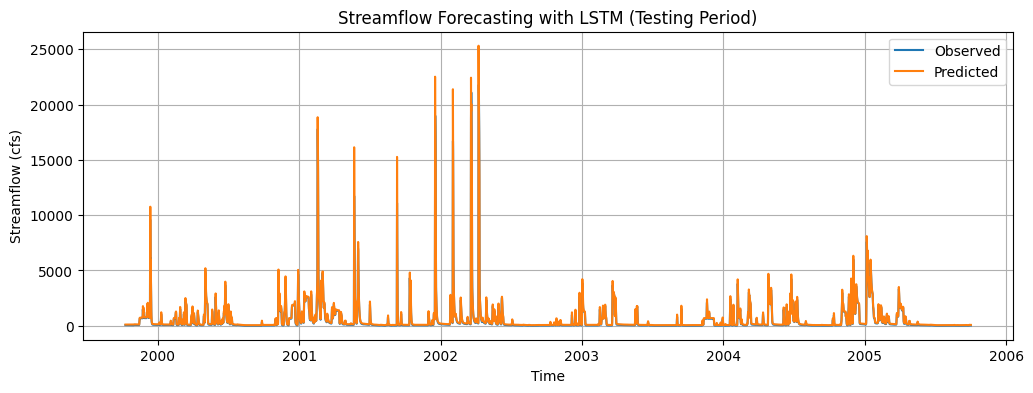

In [50]:
# Plotting the observed vs. predicted streamflow values for the testing period
plt.figure(figsize=(12, 4))
plt.plot(testing_data.index[n_steps:], y_test, label='Observed', linestyle='-')
plt.plot(testing_data.index[n_steps:], y_pred, label='Predicted', linestyle='-')
plt.title('Streamflow Forecasting with LSTM (Testing Period)')
plt.xlabel('Time')
plt.ylabel('Streamflow (cfs)')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
merged_df.head()

,datetime,Discharge_Sim,agency_cd,site_no,Discharge_USGS,112837_00060_cd,year,month
0,1990-10-01 12:00:00,129,USGS,7336200,132.0,A:[91],1990,10
1,1990-10-01 18:00:00,127,USGS,7336200,120.0,A:[91],1990,10
2,1990-10-02 00:00:00,126,USGS,7336200,115.0,A:[91],1990,10
3,1990-10-02 06:00:00,125,USGS,7336200,107.0,A:[91],1990,10
4,1990-10-02 12:00:00,124,USGS,7336200,104.0,A:[91],1990,10


In [52]:
merged_df.columns

Index(['datetime', 'Discharge_Sim', 'agency_cd', 'site_no', 'Discharge_USGS',
       '112837_00060_cd', 'year', 'month'],
      dtype='object')

**Dropping Observed**

In [53]:
data = merged_df

# Selecting only the desired columns
selected_columns = ['datetime', 'Discharge_Sim']
data = data[selected_columns]

data['datetime'] = pd.to_datetime(data['datetime'])
data.set_index('datetime', inplace=True)

In [54]:

data = merged_df

# Selecting only the desired columns
selected_columns = ['datetime', 'Discharge_Sim']
data = data[selected_columns]

# Resetting the index
data.reset_index(inplace=True)

data['datetime'] = pd.to_datetime(data['datetime'])
data.set_index('datetime', inplace=True)

# Define the time frames for training, testing, and validation
training_period_start_1 = '2005-10-02 12:00:00'
training_period_end_1 = '2020-12-31 12:00:00'
testing_period_start = '1999-10-02 12:00:00'
testing_period_end = '2005-10-01 12:00:00'
validation_period_start = '1990-10-01 12:00:00'
validation_period_end = '1995-10-01 12:00:00'

# Extracting the selected columns within the training, testing, and validation periods
training_data = data.loc[training_period_start_1:training_period_end_1]
testing_data = data.loc[testing_period_start:testing_period_end]
validation_data = data.loc[validation_period_start:validation_period_end]

# Extracting the target variable for training, testing, and validation
train_target = training_data['Discharge_Sim'].values
test_target = testing_data['Discharge_Sim'].values
validate_target = validation_data['Discharge_Sim'].values

# Normalizing the target variable data (scaling to values between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))
train_target = scaler.fit_transform(train_target.reshape(-1, 1))
test_target = scaler.transform(test_target.reshape(-1, 1))
validate_target = scaler.transform(validate_target.reshape(-1, 1))

# Preparing the dataset for training, testing, and validation
n_steps = 30  # Assuming you want to keep this value
X_train, y_train = prepare_dataset(training_data.values, n_steps)
X_test, y_test = prepare_dataset(testing_data.values, n_steps)
X_validate, y_validate = prepare_dataset(validation_data.values, n_steps)

# Reshaping the input data for LSTM (3D input)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], len(selected_columns)))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], len(selected_columns)))
X_validate = X_validate.reshape((X_validate.shape[0], X_validate.shape[1], len(selected_columns)))


In [55]:

# Defining a function to prepare the dataset for LSTM
def prepare_dataset(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps])
        y.append(data[i + n_steps])
    return np.array(X), np.array(y)

# Defining the number of time steps to consider  (30 days because its a monthly data)
n_steps = 30

# Preparing the dataset for training, testing, and validation
X_train, y_train = prepare_dataset(train_streamflow, n_steps)
X_test, y_test = prepare_dataset(test_streamflow, n_steps)
X_validate, y_validate = prepare_dataset(validate_streamflow, n_steps)

In [56]:
# Defining the LSTM model
model = Sequential()
model.add(LSTM(units=10, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model on the training data
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_validate, y_validate))

# Making predictions on the test set
y_pred = model.predict(X_test)

Epoch 1/10
1046/1046 [==============================] - 14s 12ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 2/10
1046/1046 [==============================] - 13s 12ms/step - loss: 3.7711e-04 - val_loss: 3.5033e-04
Epoch 3/10
1046/1046 [==============================] - 13s 13ms/step - loss: 2.2192e-04 - val_loss: 2.9414e-04
Epoch 4/10
1046/1046 [==============================] - 12s 11ms/step - loss: 1.9128e-04 - val_loss: 3.2081e-04
Epoch 5/10
1046/1046 [==============================] - 12s 12ms/step - loss: 1.7308e-04 - val_loss: 2.5529e-04
Epoch 6/10
1046/1046 [==============================] - 15s 14ms/step - loss: 1.7529e-04 - val_loss: 2.1229e-04
Epoch 7/10
1046/1046 [==============================] - 13s 13ms/step - loss: 1.5832e-04 - val_loss: 2.3617e-04
Epoch 8/10
1046/1046 [==============================] - 13s 13ms/step - loss: 1.6193e-04 - val_loss: 2.2369e-04
Epoch 9/10
1046/1046 [==============================] - 13s 12ms/step - loss: 1.6646e-04 - val_loss: 2.7023e-04


In [58]:
# Inversing transform the predictions to the original scale
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Calculating Mean Squared Error (MSE) for evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculating Nash-Sutcliffe Efficiency (NSE) for evaluation
nse = 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))
print(f"Nash-Sutcliffe Efficiency (NSE): {nse}")

Mean Squared Error (MSE): 742891825757212.1
Nash-Sutcliffe Efficiency (NSE): 0.9561480121774891


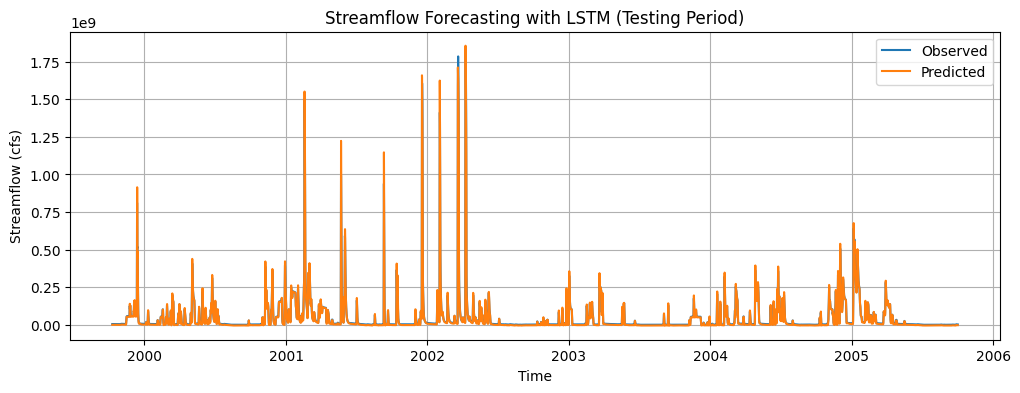

In [59]:
# Plotting the observed vs. predicted streamflow values for the testing period
plt.figure(figsize=(12, 4))
plt.plot(testing_data.index[n_steps:], y_test, label='Observed', linestyle='-')
plt.plot(testing_data.index[n_steps:], y_pred, label='Predicted', linestyle='-')
plt.title('Streamflow Forecasting with LSTM (Testing Period)')
plt.xlabel('Time')
plt.ylabel('Streamflow (cfs)')
plt.legend()
plt.grid(True)
plt.show()

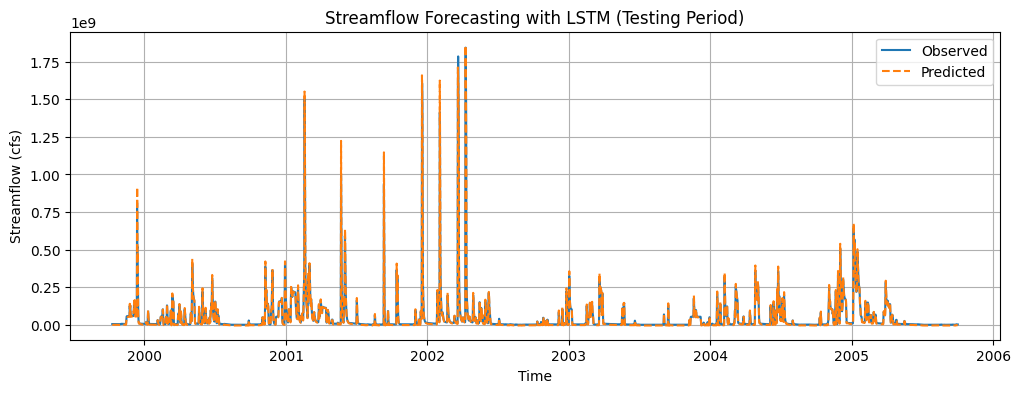

In [60]:
# Plotting the observed vs. predicted streamflow values for the testing period
plt.figure(figsize=(12, 4))
plt.plot(testing_data.index[n_steps:], y_test, label='Observed', linestyle='-')
plt.plot(testing_data.index[n_steps:], y_pred, label='Predicted', linestyle='--')  # Use a different linestyle
plt.title('Streamflow Forecasting with LSTM (Testing Period)')
plt.xlabel('Time')
plt.ylabel('Streamflow (cfs)')
plt.legend()
plt.grid(True)
plt.show()
